In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [28]:
column_names = [
    'top_left_square', 'top_middle_square', 'top_right_square',
    'middle_left_square', 'middle_middle_square', 'middle_right_square',
    'bottom_left_square', 'bottom_middle_square', 'bottom_right_square',
    'class'
]
df = pd.read_csv('tic-tac-toe.data',names = column_names)


In [29]:
label_encoder = LabelEncoder()
df['top_left_square'] = label_encoder.fit_transform(df['top_left_square'])
df['top_middle_square'] = label_encoder.fit_transform(df['top_middle_square'])
df['top_right_square'] = label_encoder.fit_transform(df['top_right_square'])
df['middle_left_square'] = label_encoder.fit_transform(df['middle_left_square'])
df['middle_middle_square'] = label_encoder.fit_transform(df['middle_middle_square'])
df['middle_right_square'] = label_encoder.fit_transform(df['middle_right_square'])
df['bottom_left_square'] = label_encoder.fit_transform(df['bottom_left_square'])
df['bottom_middle_square'] = label_encoder.fit_transform(df['bottom_middle_square'])
df['bottom_right_square'] = label_encoder.fit_transform(df['bottom_right_square'])
df['class'] = label_encoder.fit_transform(df['class'])

In [43]:
X = df.drop('class', axis=1)
y = df['class']

In [15]:
df.shape

(958, 10)

In [16]:
X.shape

(958, 9)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [33]:
classifier = GaussianNB()

In [34]:
classifier.fit(X_train, y_train)

GaussianNB()

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [37]:
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7083333333333334

Confusion Matrix:
[[ 13  54]
 [  2 123]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.19      0.32        67
           1       0.69      0.98      0.81       125

    accuracy                           0.71       192
   macro avg       0.78      0.59      0.57       192
weighted avg       0.75      0.71      0.64       192



# Confusion Matrix HeatMap

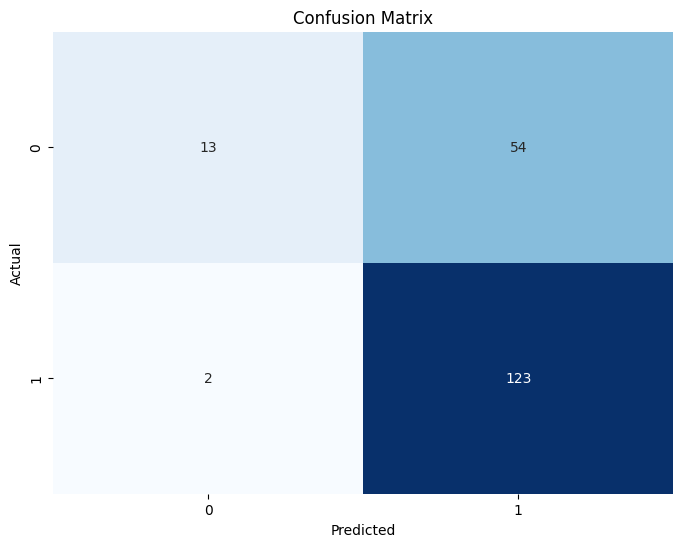

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Receiver Operating Characteristic (ROC) Curve:

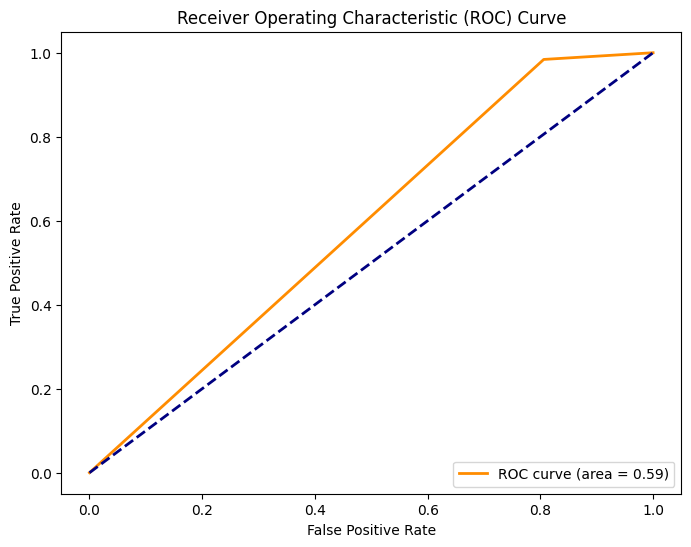

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Precision-Recall Curve:

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve and area for each class
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Average Precision = {:.2f})'.format(average_precision))
plt.show()
